In [9]:
import pandas as pd
web_search_results_benchmark = pd.read_csv('../data_storage/benchmark/web_search_results_benchmark.csv')
benchmark_large = pd.read_csv('../data_storage/benchmark/benchmark_large.csv')

In [8]:
# Add a ranking column based on the original sequence in benchmark_large
benchmark_large['rank'] = range(1, len(benchmark_large) + 1)

# Merge the DataFrames on 'title' and 'publication_date' using a left join
merged_df = pd.merge(web_search_results_benchmark, benchmark_large, on=['title', 'publication_date'], how='left', suffixes=('_2', '_1'))

# Select and rename the 'Hit?' columns, including title and rank
result_df = merged_df[['title', 'Hit?_1', 'Hit?_2', 'rank']]
result_df.columns = ['Title', 'Hits_1', 'Hits_2', 'Rank']

# Replace NaN values with an empty string in 'Hits_1' if there was no match
result_df['Hits_1'] = result_df['Hits_1'].fillna('')

# Sort by the rank column to maintain the order of the original benchmark_large table
result_df.sort_values('Rank', inplace=True)

# Drop the Rank column if not needed in the final output or keep it if required
# result_df.drop('Rank', axis=1, inplace=True)

# Save or display the result
print(result_df)
# Optionally save to a new CSV
result_df.to_csv('../data_storage/benchmark/merged_ranked_results.csv', index=False)

                                                 Title Hits_1 Hits_2  Rank
197  San Diego police sergeant recovering after bei...      Y      N   1.0
169  San Diego Police Sergeant Shot and Wounded, Su...      Y      Y   2.0
142  Suspect identified in 4S Ranch shootout that i...      Y      N   3.0
174  Man shot by police officer in St. Paul dies of...      Y      Y   4.0
459  Las Vegas police officer identified after shoo...      N      N   5.0
..                                                 ...    ...    ...   ...
491  Elk Grove police fatally shoot man they say wa...             Y   NaN
492  Video shows chase, shooting involving knife-wi...             N   NaN
494  IMPD Releases Edited Footage of Oct. 19th Shoo...             N   NaN
495  Homeless suspect in Hollywood activist murder ...             N   NaN
496  Iowa mom loses legs, needs facial reconstructi...             N   NaN

[497 rows x 4 columns]


/var/folders/0q/xl_nx_j57hng0y0n98lxq8k40000gn/T/ipykernel_40768/441067906.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['Hits_1'] = result_df['Hits_1'].fillna('')
/var/folders/0q/xl_nx_j57hng0y0n98lxq8k40000gn/T/ipykernel_40768/441067906.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.sort_values('Rank', inplace=True)


0       0.000000
1      50.000000
2      66.666667
3      50.000000
4      40.000000
         ...    
492    30.425963
493    30.364372
494    30.303030
495    30.241935
496    30.181087
Name: Hit, Length: 497, dtype: float64


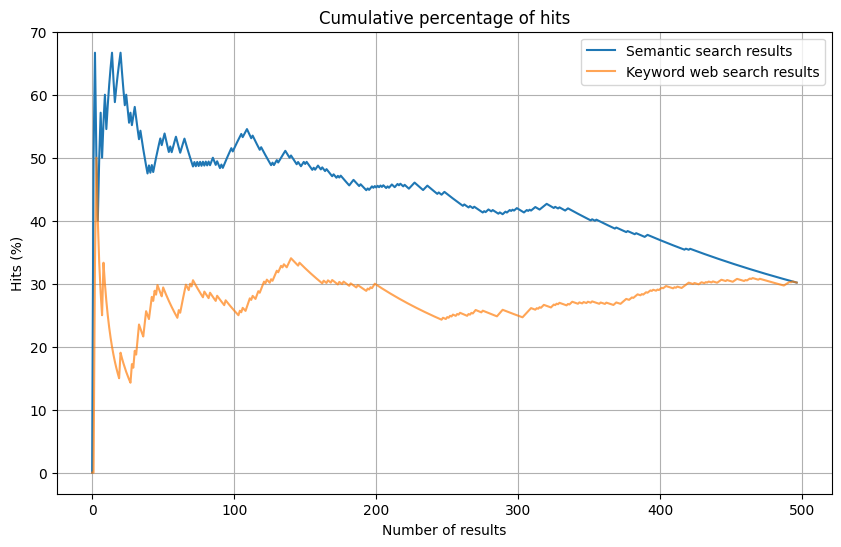

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
# benchmark_large = pd.read_csv('../data_storage/benchmark/benchmark_large_validated.csv')
web_search_results_benchmark = pd.read_csv('../data_storage/benchmark/web_search_results_benchmark.csv')

# Function to calculate cumulative percentage of "Y"
def calculate_cumulative_percentage(df):
    # Calculate "Y" as 1, "N" as 0
    df['Hit'] = (df['Hit?'] == 'Y').astype(int)
    # Calculate cumulative sum of "Y"s
    cumulative_hits = df['Hit'].cumsum()
    # Normalize to get percentage
    cumulative_percent = 100 * cumulative_hits / range(1, len(df) + 1)
    return cumulative_percent

# Apply the function to both dataframes
benchmark_large_percent = calculate_cumulative_percentage(merged_results)
web_search_results_benchmark_percent = calculate_cumulative_percentage(web_search_results_benchmark)
# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(benchmark_large_percent, label='Semantic search results')
plt.plot(web_search_results_benchmark_percent, label='Keyword web search results', alpha=0.7)
plt.title('Cumulative percentage of hits')
plt.xlabel('Number of results')
plt.ylabel('Hits (%)')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
print(benchmark_large_percent[30:])
print(web_search_results_benchmark_percent[30:])

30     58.064516
31     56.250000
32     54.545455
33     52.941176
34     54.285714
         ...    
492    30.425963
493    30.364372
494    30.303030
495    30.241935
496    30.181087
Name: Hit, Length: 467, dtype: float64
30     19.354839
31     18.750000
32     21.212121
33     23.529412
34     22.857143
         ...    
492    30.223124
493    30.364372
494    30.303030
495    30.241935
496    30.181087
Name: Hit, Length: 467, dtype: float64
